In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('dailyCost7_14_2025_to_8_12_2025.csv')
df1 = pd.read_csv('hourlyCost7_14_2025_to_8_5_2025.csv')
df['Usage date'] = pd.to_datetime(df['Usage date'])
df['Total cost'] = df['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df['Day of week'] = df['Usage date'].dt.day_name()
print(df.dtypes)
df.head()

Meter read date                 object
Usage date              datetime64[ns]
Total cost                     float64
High temperature (F)           float64
Low temperature (F)            float64
Day of week                     object
dtype: object


,Meter read date,Usage date,Total cost,High temperature (F),Low temperature (F),Day of week
0,7/15/2025,2025-07-14,6.81,105.0,87.0,Monday
1,7/16/2025,2025-07-15,4.42,105.0,86.0,Tuesday
2,7/17/2025,2025-07-16,3.23,95.0,82.0,Wednesday
3,7/18/2025,2025-07-17,3.53,100.0,80.0,Thursday
4,7/19/2025,2025-07-18,5.17,106.0,86.0,Friday


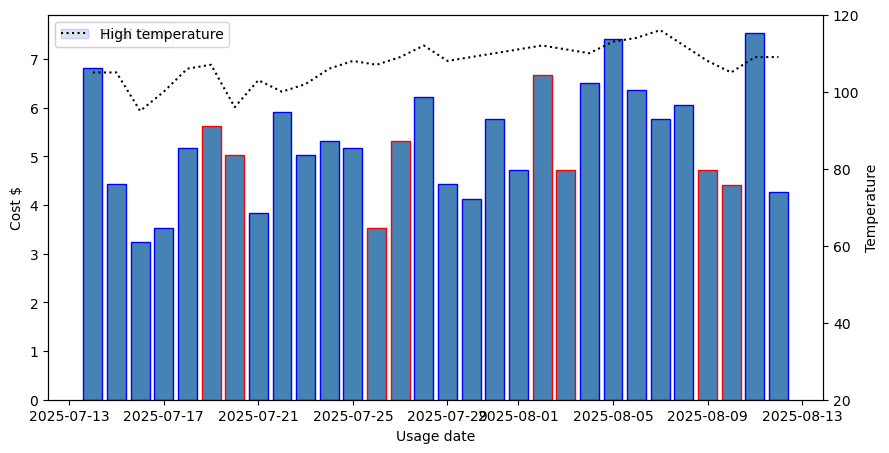

In [3]:
colors = ['red' if day in ['Saturday', 'Sunday'] else 'blue' for day in df['Day of week']]
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(df['Usage date'], df['Total cost'], edgecolor = colors, color = 'steelblue', label = 'Total Cost')
ax1 = ax.twinx()
ax1.plot(df['Usage date'], df['High temperature (F)'], 'k', ls = 'dotted', label = 'High temperature') 
ax.set_xlabel('Usage date')
ax.set_ylabel('Cost $')
#ax.set_ylim(0,8)
ax1.set_ylabel('Temperature')
ax1.set_ylim(20,120)
ax.legend()
ax1.legend()

In [36]:
stat = df['Total cost'][:-1].agg(['mean', 'max', 'min', 'std'])
print(stat)

above_average = df[df['Total cost'].ge(stat['mean'])]

print(above_average.groupby('Day of week').value_counts())

mean    5.252000
max     7.530000
min     3.230000
std     1.130091
Name: Total cost, dtype: float64
Day of week  Meter read date  Usage date  Total cost  High temperature (F)  Low temperature (F)
Friday       8/9/2025         2025-08-08  6.06        112.0                 89.0                   1
Monday       7/15/2025        2025-07-14  6.81        105.0                 87.0                   1
             7/29/2025        2025-07-28  6.21        112.0                 82.0                   1
             8/12/2025        2025-08-11  7.53        109.0                 90.0                   1
             8/5/2025         2025-08-04  6.51        110.0                 85.0                   1
Saturday     7/20/2025        2025-07-19  5.62        107.0                 86.0                   1
             8/3/2025         2025-08-02  6.66        112.0                 89.0                   1
Sunday       7/28/2025        2025-07-27  5.32        109.0                 81.0                

In [5]:
weekend_costs = df[df["Day of week"].isin(["Saturday", "Sunday"])]["Total cost"]
print(weekend_costs)

5     5.62
6     5.02
12    3.53
13    5.32
19    6.66
20    4.72
26    4.72
27    4.41
Name: Total cost, dtype: float64


In [6]:
df1['Total cost'] = df1['Total cost'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
df1['Usage date'] = pd.to_datetime(df['Usage date'])
df1.head()

,Usage date,Interval,Total cost
0,2025-07-14,12:0 AM,0.12
1,2025-07-15,1:0 AM,0.11
2,2025-07-16,2:0 AM,0.12
3,2025-07-17,3:0 AM,0.11
4,2025-07-18,4:0 AM,0.10


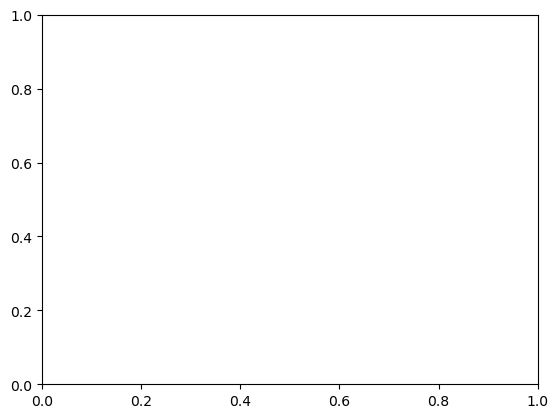

In [ ]:
print(range(len(df1['Usage date'])))

In [ ]:
np.arange(1,10)